In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wihar545","key":"4dff9a717c451c408eba3508e05e4c65"}'}

- kaggle.json file must be uploaded here which can be downloaded from Kaggle profile

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# /content/sample_data/kaggle.json

In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d robikscube/flight-delay-dataset-20182022

100% 3.73G/3.73G [00:48<00:00, 135MB/s]
100% 3.73G/3.73G [00:48<00:00, 82.9MB/s]


In [ ]:
# !unzip flight-delay-dataset-20182022.zip

In [ ]:
!unzip flight-delay-dataset-20182022.zip Combined_Flights_2018.csv Combined_Flights_2019.csv Combined_Flights_2020.csv Combined_Flights_2021.csv Combined_Flights_2022.csv

Archive:  flight-delay-dataset-20182022.zip
  inflating: Combined_Flights_2018.csv  
  inflating: Combined_Flights_2019.csv  
  inflating: Combined_Flights_2020.csv  
  inflating: Combined_Flights_2021.csv  
  inflating: Combined_Flights_2022.csv  


- Downloaded the zip file of the data directly from Kaggle with the help of kaggle packages provided in Google Colab.
- Unzipping the files so that they can be used in the project

```
`# This is formatted as code`
```



In [1]:
import pandas as pd

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("FlightDelayAnalysis").getOrCreate()

flights = spark.read.format("csv").option("header", "true").load("/content/Combined_Flights_2019.csv")

flights.show()

+----------+---------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+---------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|  Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinutes|Air

In [3]:
flights18 = spark.read.format("csv").option("header", "true").load("/content/Combined_Flights_2018.csv")

flights20 = spark.read.format("csv").option("header", "true").load("/content/Combined_Flights_2020.csv")

flights21 = spark.read.format("csv").option("header", "true").load("/content/Combined_Flights_2021.csv")

flights22 = spark.read.format("csv").option("header", "true").load("/content/Combined_Flights_2022.csv")


- Loading the data downloaded from kaggle into Spark DataFrame to perform Transformations and Actions.

In [ ]:
flights18.show()

+----------+-----------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrD

In [ ]:
flights20.show()

+----------+-----------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+----------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|    Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinute

In [ ]:
flights21.show()

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+--------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|D

In [ ]:
flights22.show()

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|De



```
`[# This is formatted as code](https:// [link text](https:// [link text](https:// [link text](https:// [link text](https://)))))`
```

> Taking only years 2020, 2021 and 2022 as we need resources not sufficient for all years

In [4]:
# concatenating the dataframes vertically
final_df = flights20.union(flights21).union(flights22)

final_df.show()

+----------+-----------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+----------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|    Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinute

- Merging dataframes of 3 years to make a final data frame

In [5]:
num_rows = final_df.count()
num_cols = len(final_df.columns)

print("DataFrame Shape: ({}, {})".format(num_rows, num_cols))

DataFrame Shape: (15412586, 61)


In [23]:
keep_list = ["IAD", "BWI", "JFK", "BOS", "DEN", "MIA", "ORD", "SLC", "SEA", "HOU", "ORL", "MIA", "LAS", "BNA","CVG", "DTW", "PIT", "LAX"]

df_filtered = final_df.filter(final_df.Origin.isin(keep_list))

df_filtered.show()

+----------+-----------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------+---------+-------------+--------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|    Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinute

- Filtering only required airports

In [10]:
# num_rows = df_filtered.count()
# num_cols = len(df_filtered.columns)

# print("DataFrame Shape: ({}, {})".format(num_rows, num_cols))

In [7]:
import pyspark.sql.functions as F

# Check if the Airline column contains any null values
if df_filtered.where(F.isnull("Airline")).count() > 0:
  print("The Airline column contains null values.")
else:
  print("The Airline column does not contain null values.")


The Airline column does not contain null values.


In [ ]:
df_filtered.where(F.isnull("Origin")).count()

0

In [ ]:
df_filtered.where(F.isnull("Dest")).count()

0

- There are no nulls in major columns

## Exploring total trips of each Airline

In [8]:
from pyspark.sql.functions import count

value_counts = df_filtered.groupBy("airline").agg(count("*").alias("count")).orderBy("count", ascending=False)
value_counts.show()


+--------------------+------+
|             airline| count|
+--------------------+------+
|Southwest Airline...|858056|
|SkyWest Airlines ...|645056|
|Delta Air Lines Inc.|588162|
|American Airlines...|471290|
|United Air Lines ...|463515|
|   Republic Airlines|217452|
|Alaska Airlines Inc.|209157|
|     JetBlue Airways|207125|
|           Envoy Air|144055|
|    Spirit Air Lines|143040|
|   Endeavor Air Inc.|133949|
|Frontier Airlines...|115086|
|         Horizon Air| 91554|
|Air Wisconsin Air...| 88464|
|GoJet Airlines, L...| 48039|
|       Allegiant Air| 47396|
|  Mesa Airlines Inc.| 43527|
|Commutair Aka Cha...| 28559|
|         Comair Inc.| 19860|
|Capital Cargo Int...| 11317|
+--------------------+------+
only showing top 20 rows



In [9]:
import plotly.express as px

fig = px.bar(value_counts.toPandas(), x='count', y='airline', orientation='h',
             color='count', color_discrete_sequence=px.colors.qualitative.Pastel, template='plotly_dark')

fig.update_layout(
    width=800,
    height=800,
    xaxis=dict(
        title='Count'
    ),
    yaxis=dict(
        title='Airline',
        tickfont=dict(size=12)
    )
)

fig.show()


- SouthWest Airlines provides most trips

## How many flights are there for each delay minute

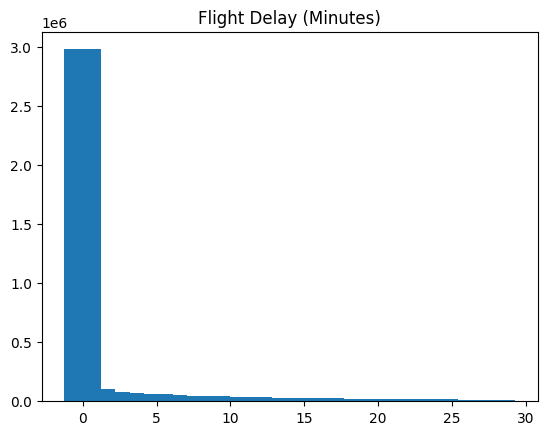

In [10]:
from pyspark.sql.functions import col, expr
import matplotlib.pyplot as plt

df_filtered = df_filtered.na.drop(subset=['DepDelayMinutes'])
df_filtered = df_filtered.withColumn('DepDelayMinutes', col('DepDelayMinutes').cast('int'))

# Selecting flights with delay less than 30 minutes
delayed_flights = df_filtered.filter(col("DepDelayMinutes") < 30)

# Creating a histogram of the delayed flights
histogram = delayed_flights.select("DepDelayMinutes").rdd.flatMap(lambda x: x).histogram(30)

plt.bar(histogram[0][:-1], histogram[1], width=2.5)
plt.title("Flight Delay (Minutes)")
plt.show()


- As many flights are on time with delay 0, below we are exploring for other delay minutes. 

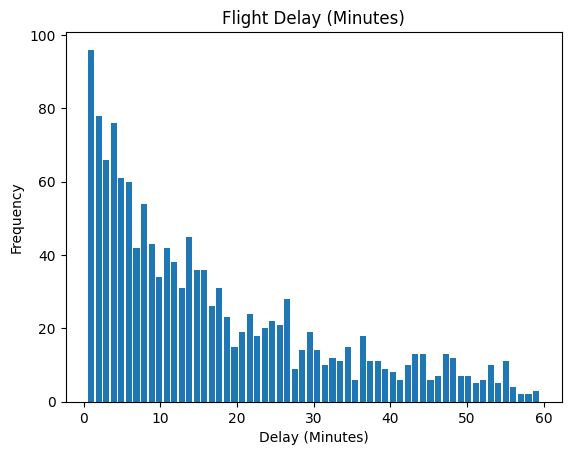

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf

df_filtered1 = df_filtered.withColumn('DepDelayMinutes', col('DepDelayMinutes').cast('int'))
# Filtering the DataFrame and convert the DepDelayMinutes column to integer type
df_filtered1 = df_filtered1.filter((df_filtered.DepDelayMinutes > 0) & (df_filtered.DepDelayMinutes < 61))


# Computing the histogram of DepDelayMinutes column
histogram_data = df_filtered1.select('DepDelayMinutes').rdd.flatMap(lambda x: x).histogram(60)

# Converting the histogram data to a Pandas DataFrame
histogram_df = pd.DataFrame(list(zip(*histogram_data)), columns=['bin', 'frequency'])

plt.bar(histogram_df['bin'], histogram_df['frequency'])
plt.title('Flight Delay (Minutes)')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()


- As we can see most by 60 minutes there were very resonable number of delays.
- Hence we filter they in future use so that it does not affect the performance. 

## Exploring the delays of each airline

<ipython-input-26-08b0d419b73a>:13: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



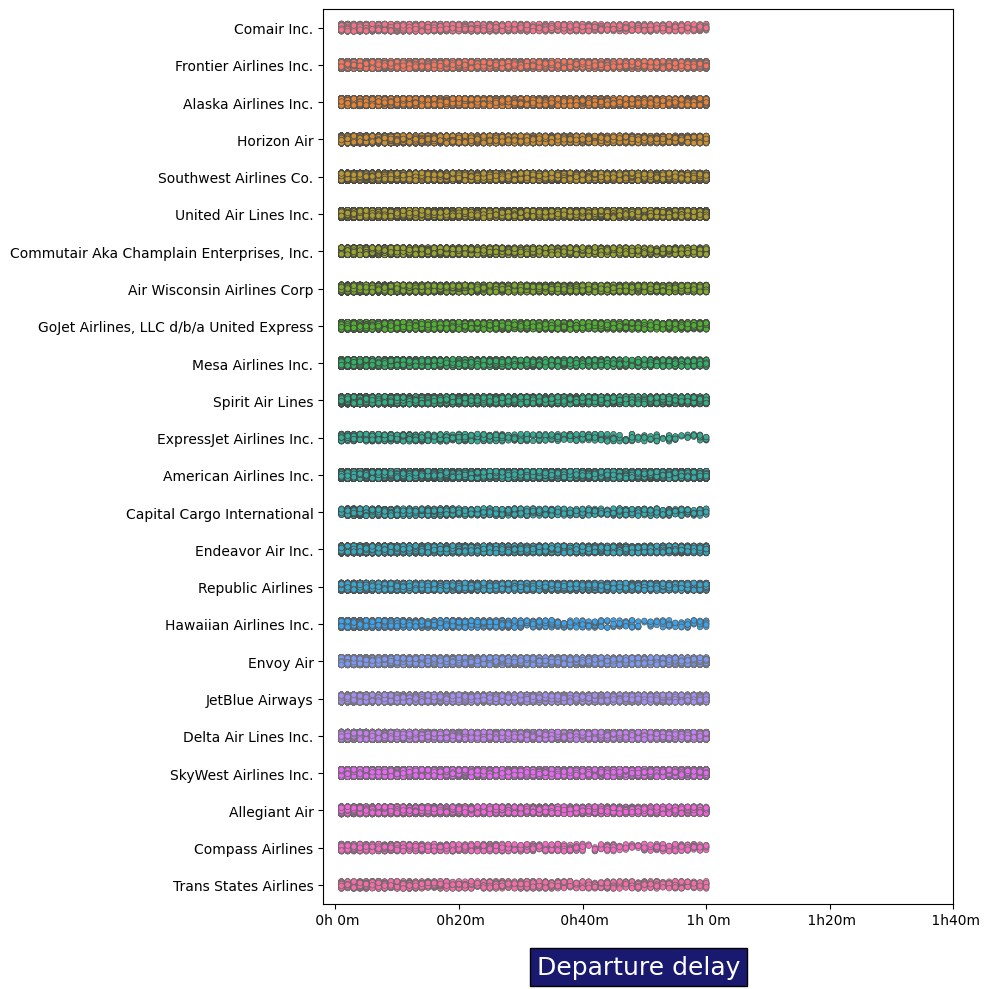

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Selecting only the 'Airline' and 'DepDelayMinutes' columns to reduce the burden while converting to Pandas and improve performance
df_filtered_pd = df_filtered.select('Airline', 'DepDelayMinutes').toPandas()


colors = sns.color_palette('husl', n_colors=len(df_filtered_pd['Airline'].unique()))

fig, ax = plt.subplots(figsize=(10,10))

sns.stripplot(y='Airline', x='DepDelayMinutes', size=4, palette=colors,
              data=df_filtered_pd, linewidth=0.5, jitter=True, ax=ax)

# Setting the tick positions using ax.set_xticks before setting the tick labels
ax.set_xticks(range(0, 120, 20))
ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)]) for x in ax.get_xticks()])

ax.set_xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
               color='w', labelpad=20)
ax.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)

plt.show()


In [12]:
!pip install calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Exploring how many flights were canceled throught the year from 2020-22

/usr/local/lib/python3.10/dist-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/usr/local/lib/python3.10/dist-packages/calmap/__init__.py:206: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



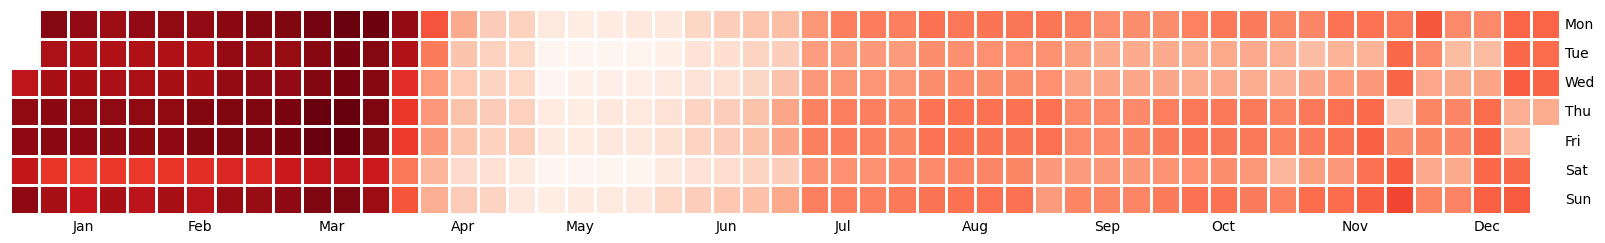

/usr/local/lib/python3.10/dist-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/usr/local/lib/python3.10/dist-packages/calmap/__init__.py:206: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



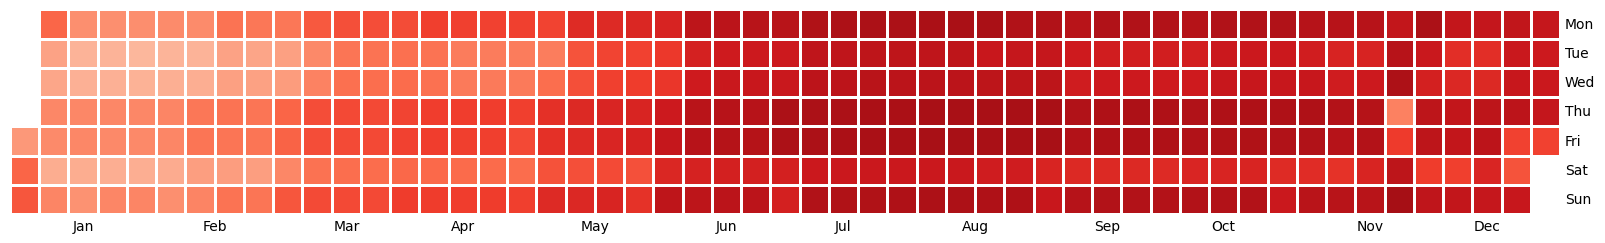

/usr/local/lib/python3.10/dist-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/usr/local/lib/python3.10/dist-packages/calmap/__init__.py:206: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



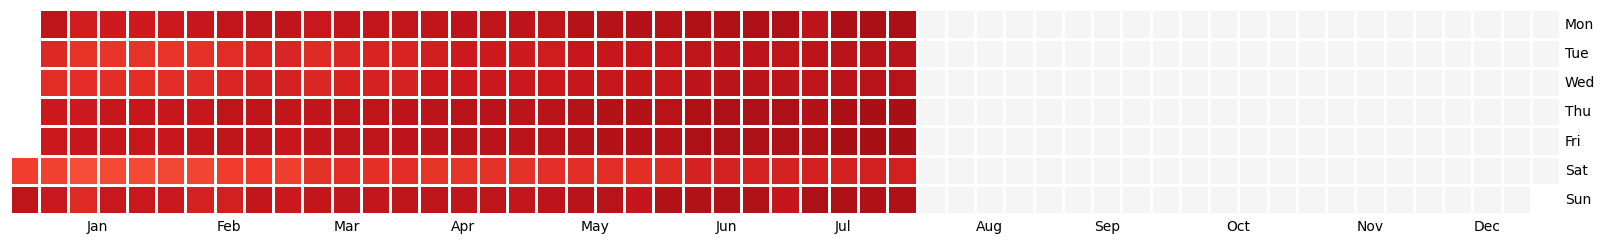

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import calmap

# Convert the Spark DataFrame to a Pandas DataFrame
df_events = df_filtered.select(
    F.col("FlightDate"),
    F.col("Cancelled"),
    F.col("year")
).toPandas()

# Convert the FlightDate column to a datetime object
df_events["FlightDate"] = pd.to_datetime(df_events["FlightDate"])

# Convert the Cancelled column to a boolean
df_events['Cancelled'] = df_events['Cancelled'].astype(bool)

# Group the events DataFrame by 'FlightDate' column and count the number of True values in 'Cancelled' column
events = df_events.groupby('FlightDate')['Cancelled'].apply(lambda x: x.eq(True).sum())

# Create the calendar plot
for i in range(3):
  fig, ax = plt.subplots(figsize=(20,10))
  calmap.yearplot(events, year=df_events['FlightDate'].dt.year.unique()[i])
  plt.show()

In [24]:
keep_list = ["IAD", "BWI", "JFK", "BOS", "DEN", "MIA", "ORD", "SLC", "SEA", "HOU", "ORL", "MIA", "LAS", "BNA","CVG", "DTW", "PIT", "LAX"]

df_filtered = final_df.filter(final_df.Origin.isin(keep_list))

df_filtered.show()

+----------+-----------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------+---------+-------------+--------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|    Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinute

## 1.Find the airport with the largest number of departure flight

In [ ]:
from pyspark.sql.functions import desc

# Group by Origin and count the number of rows in each group
departure_counts = df_filtered.groupBy('Origin').count()

# Sort by count in descending order and take the first row
busiest_airport_dest = departure_counts.orderBy(desc('count')).first()

print('The busiest airport is', busiest_airport_dest['Origin'], 'with', busiest_airport_dest['count'], 'departures.')


The busiest airport is ORD with 684160 departures.


In [ ]:
top_departure_airports = departure_counts.orderBy(desc('count')).limit(10)

print('Top 10 airports with largest number of departure flights are:')
top_departure_airports.show()

Top 10 airports with largest number of departure flights are:
+------+------+
|Origin| count|
+------+------+
|   ORD|684160|
|   DEN|631784|
|   LAX|418768|
|   SEA|400233|
|   LAS|353328|
|   DTW|317461|
|   SLC|276113|
|   BOS|244472|
|   JFK|218879|
|   MIA|214953|
+------+------+



In [ ]:
fig = px.bar_polar(top_departure_airports.toPandas(), r='count', theta='Origin', color='Origin',
                   color_discrete_sequence=px.colors.qualitative.Pastel, template='plotly_dark')

fig.update_layout(
    title='Top 10 Airports with the Largest Number of Departure Flights',
    width=800,
    height=800,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, top_departure_airports.toPandas()['count'].max() + 50]
        )
    ),
    showlegend=False
)

fig.show()

- ORD has the most number of depature flights

## 2. Find the airport with the largest number of arriving flight

In [ ]:
from pyspark.sql.functions import desc

# Group by Origin and count the number of rows in each group
arrival_counts = df_filtered.groupBy('Dest').count()

# Sort by count in descending order and take the first row
busiest_airport_arr = arrival_counts.orderBy(desc('count')).first()

print('The busiest airport is', busiest_airport_arr['Dest'], 'with', busiest_airport_arr['count'], 'arrivals.')


The busiest airport is ATL with 154712 arrivals.


In [ ]:
arrival_counts = df_filtered.groupBy('Dest').count()

# Sort by count in descending order and take the top 10 rows
top_arrival_airports = arrival_counts.orderBy(desc('count')).limit(10)

# Show top 10 airports with largest number of arrival flights
top_arrival_airports.show()

+----+------+
|Dest| count|
+----+------+
| ATL|154712|
| LAX|136909|
| DEN|131471|
| ORD|128891|
| DFW|122457|
| PHX|114047|
| SFO|108116|
| LAS|105653|
| MCO|101524|
| CLT| 94202|
+----+------+



In [ ]:
fig = px.scatter(top_arrival_airports.toPandas(), x='Dest', y='count', size='count',
                 color='count', hover_name='Dest', hover_data=['count'],
                 color_continuous_scale=px.colors.sequential.Viridis, template='plotly_dark')

# Customize the layout
fig.update_layout(
    title='Top 10 Arrival Airports',
    xaxis_title='Airport Code',
    yaxis_title='Number of Arrivals',
    showlegend=False,
    width=800,
    height=500
)

# Show the plot
fig.show()

- ATL has the most number of arrival flights.

## 3. Find the busiest airport

In [ ]:
from pyspark.sql.functions import desc, sum

# Creating separate DataFrames for departures and arrivals
departures = df_filtered.groupBy('Origin').count().withColumnRenamed('Origin', 'Airport').withColumnRenamed('count', 'Departures')
arrivals = df_filtered.groupBy('Dest').count().withColumnRenamed('Dest', 'Airport').withColumnRenamed('count', 'Arrivals')

# Joining the DataFrames and group by Airport
airport_counts = departures.join(arrivals, 'Airport', 'outer').fillna(0)
airport_counts = airport_counts.withColumn('Total', airport_counts.Departures + airport_counts.Arrivals).drop('Departures', 'Arrivals')


# Sorting by Total in descending order and taking the first row
busiest_airport = airport_counts.orderBy(desc('Total')).first()

print('The busiest airport is', busiest_airport['Airport'], 'with', busiest_airport['Total'], 'departures and arrivals.')


The busiest airport is ORD with 813051 departures and arrivals.


In [ ]:
busiest_airport_10 = airport_counts.orderBy(desc('Total')).limit(10)
busiest_airport_10.show()

+-------+------+
|Airport| Total|
+-------+------+
|    ORD|813051|
|    DEN|763255|
|    LAX|555677|
|    SEA|490526|
|    LAS|458981|
|    DTW|394675|
|    SLC|347215|
|    BOS|323119|
|    JFK|295649|
|    MIA|276887|
+-------+------+



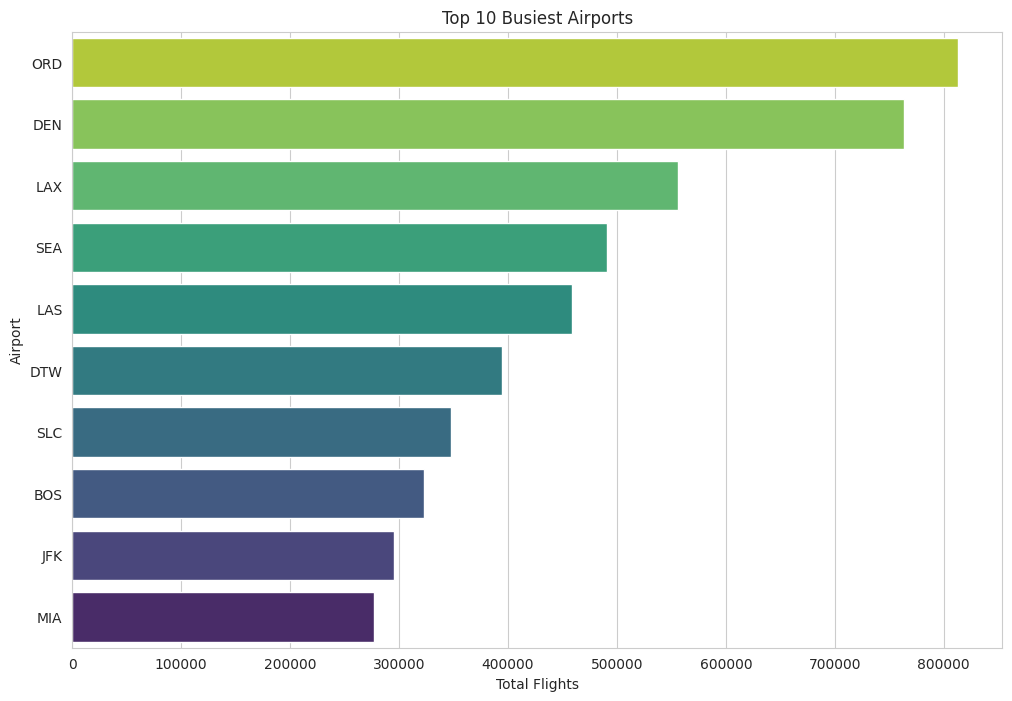

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data=busiest_airport_10.toPandas(), x='Total', y='Airport', palette='viridis_r')
plt.xlabel('Total Flights')
plt.ylabel('Airport')
plt.title('Top 10 Busiest Airports')
plt.show()

-  ORD was the busiest airport with both Arrival and Depatures.

## 4. Airports with most departure delays



In [ ]:
# Filter the DataFrame to only include rows with a departure delay
delayed_flights = df_filtered.filter(df_filtered.DepDelay > 0)

# Group the delayed flights by Origin and count the number of rows in each group
delay_counts = delayed_flights.groupBy('Origin').count().withColumnRenamed('count', 'DelayCount')

# Sort the airports by the number of delayed flights in descending order and take the top 10
top_airports = delay_counts.orderBy(desc('DelayCount')).limit(10)

print('The top 10 airports with the most departure delays are:')
top_airports.show()


The top 10 airports with the most departure delays are:
+------+----------+
|Origin|DelayCount|
+------+----------+
|   DEN|    252714|
|   ORD|    190204|
|   LAS|    134648|
|   LAX|    128355|
|   SEA|    120299|
|   BWI|     85103|
|   SLC|     78784|
|   DTW|     76000|
|   MIA|     75879|
|   JFK|     69328|
+------+----------+



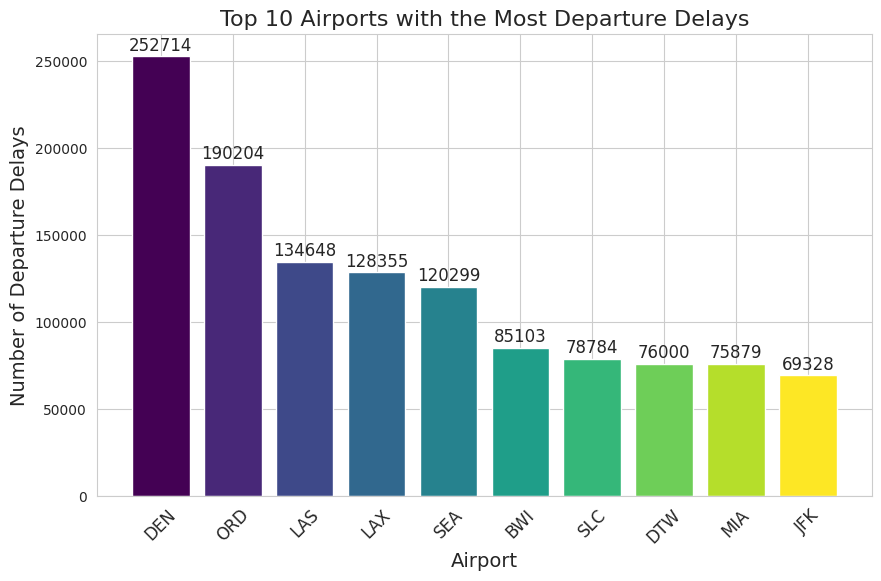

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert top_airports DataFrame to Pandas DataFrame for visualization
top_airports_pd = top_airports.toPandas()

# Set up the plot and bar colors
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 10))


# Plot the bars with different colors for each airport
bars=ax.bar(top_airports_pd['Origin'], top_airports_pd['DelayCount'], color=colors)

# Set the plot title and axis labels
ax.set_title('Top 10 Airports with the Most Departure Delays', fontsize=16)
ax.set_xlabel('Airport', fontsize=14)
ax.set_ylabel('Number of Departure Delays', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

#to display values on top of bars
for bar in bars:
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, int(bar.get_height()),ha='center', va='bottom', fontsize=12)

plt.show()


- DEN airport had most depature delays.

## 5.Airports with most Arrival delays

In [ ]:
delayed_flights = df_filtered.filter(df_filtered.ArrDelay > 0)

delay_counts = delayed_flights.groupBy('Dest').count().withColumnRenamed('count', 'DelayCount')

top_airports = delay_counts.orderBy(desc('DelayCount')).limit(10)

print('The top 10 airports with the most arrival delays are:')
top_airports.show()

The top 10 airports with the most arrival delays are:
+----+----------+
|Dest|DelayCount|
+----+----------+
| ATL|     44544|
| DEN|     41443|
| LAX|     40646|
| DFW|     39390|
| ORD|     36312|
| MCO|     35150|
| PHX|     34474|
| LAS|     33761|
| SFO|     28210|
| SEA|     27535|
+----+----------+



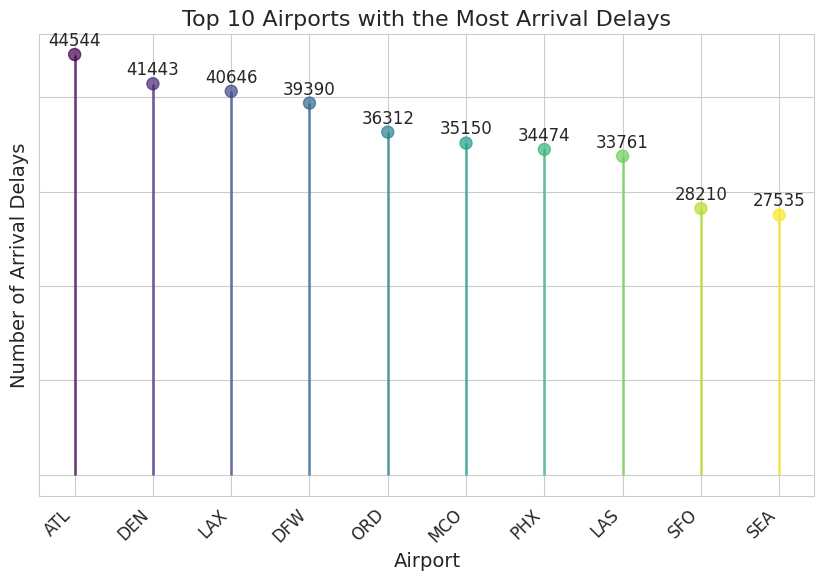

In [ ]:
import matplotlib.pyplot as plt

# Convert top_airports DataFrame to Pandas DataFrame for visualization
top_airports_pd = top_airports.toPandas()

# Set up the plot and bar colors
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the vertical lines
ax.vlines(x=top_airports_pd['Dest'], ymin=0, ymax=top_airports_pd['DelayCount'], color=colors, alpha=0.7, linewidth=2)

# Plot the circles at the top of each line
ax.scatter(x=top_airports_pd['Dest'], y=top_airports_pd['DelayCount'], s=75, color=colors, alpha=0.7)

# Add labels to the top of each vertical line
for idx, row in top_airports_pd.iterrows():
    ax.text(row['Dest'], row['DelayCount']+1000, row['DelayCount'], ha='center', fontsize=12)

# Set the plot title and axis labels
ax.set_title('Top 10 Airports with the Most Arrival Delays', fontsize=16)
ax.set_xlabel('Airport', fontsize=14)
ax.set_ylabel('Number of Arrival Delays', fontsize=14)

# Hide the y-axis labels and ticks
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()


- ATL airpor has the most Arrival delays

## List out the top 10 airports with most arrivals’ delays in the future

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col,desc


# Create a VectorAssembler to transform the features into a single vector column
assembler = VectorAssembler(inputCols=['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance'], outputCol='features')

df_filtered = df_filtered.withColumn('Year', col('Year').cast('int'))
df_filtered = df_filtered.withColumn('Month', col('Month').cast('int'))
df_filtered = df_filtered.withColumn('DayOfWeek', col('DayOfWeek').cast('int'))
df_filtered = df_filtered.withColumn('CRSDepTime', col('CRSDepTime').cast('int'))
df_filtered = df_filtered.withColumn('CRSArrTime', col('CRSArrTime').cast('int'))
df_filtered = df_filtered.withColumn('Distance', col('Distance').cast('int'))
df_filtered = df_filtered.withColumn('ArrDelay', col('ArrDelay').cast('int'))

# Filter out rows with null or NaN values in 'ArrDelay' column
df_filtered = df_filtered.na.drop(subset=['ArrDelay'])

# Transform the data using the assembler
transformed_data = assembler.transform(df_filtered)

# Split the data into training and test sets
training_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=1234)

# Train a linear regression model on the training data
lr = LinearRegression(labelCol='ArrDelay', featuresCol='features')
model = lr.fit(training_data)

# Use the trained model to make predictions on the test data
predictions = model.transform(test_data)

# Get the airports with the highest average predicted arrival delay
top_arrival_airports = predictions.groupBy('Dest').agg({'prediction': 'avg'}).withColumnRenamed('avg(prediction)', 'predicted_delay')
top_arrival_airports = top_arrival_airports.orderBy(desc('predicted_delay')).limit(10)

# Display the result
top_arrival_airports.show()


+----+------------------+
|Dest|   predicted_delay|
+----+------------------+
| CYS|14.858859591536875|
| ORH|13.653238059839918|
| RKS| 13.46087099824012|
| SPI|13.444418291348553|
| CRP|13.361620479051837|
| BFF|13.212694070837971|
| ALS|13.196921689234484|
| RIW|13.119436352384923|
| MCW|13.030232533632443|
| LAR|12.979316590449361|
+----+------------------+



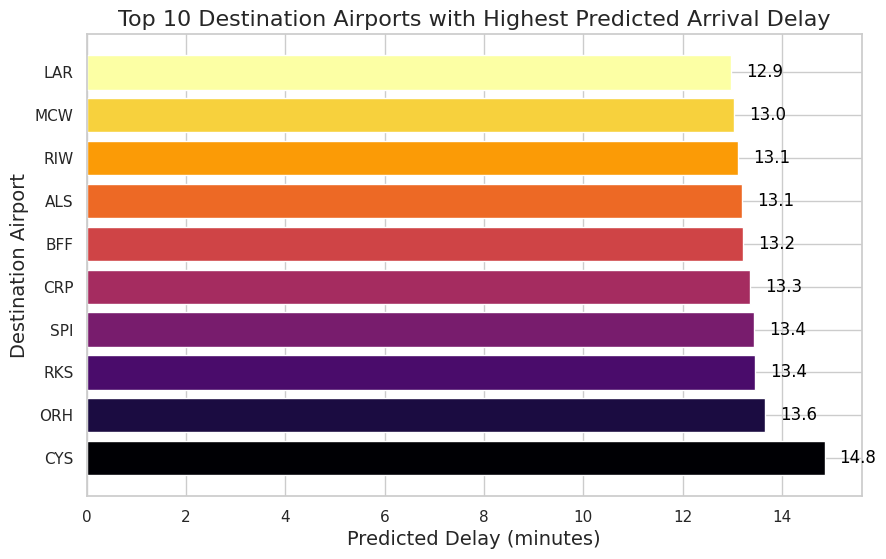

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data for plotting
airports = [row['Dest'] for row in top_arrival_airports.collect()]
predicted_delays = [row['predicted_delay'] for row in top_arrival_airports.collect()]

# Set up the plot and bar colors
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.inferno(np.linspace(0, 1, 10))

# Create a horizontal bar chart with different colors for each bar
ax.barh(airports, predicted_delays, color=colors)

# Add labels at the end of each bar
for i, v in enumerate(predicted_delays):
    ax.text(v + 0.3, i, str(v)[:4], color='black', fontsize=12, va='center')

# Add labels and title
ax.set_xlabel('Predicted Delay (minutes)', fontsize=14)
ax.set_ylabel('Destination Airport', fontsize=14)
ax.set_title('Top 10 Destination Airports with Highest Predicted Arrival Delay', fontsize=16)

# Display the chart
plt.show()

- Reference: https://towardsdatascience.com/your-first-apache-spark-ml-model-d2bb82b599dd

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the predictions using RMSE on test data
evaluator_rmse = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='rmse')
rmse = evaluator_rmse.evaluate(predictions)
print(f'RMSE: {rmse:.2f}')

# Evaluate the predictions using R2
evaluator_r2 = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='r2')
r2 = evaluator_r2.evaluate(predictions)
print(f'R2: {r2:.2f}')


RMSE: 20.54
R2: 0.02


- RMSE and R2 score is low hence model is good

### Improving efficiency of model by using feature engineering,pipeline, better ML algorithm

In [ ]:
# tried to use 
# from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
# from pyspark.ml.classification import LogisticRegression
# from pyspark.sql.functions import col
# from pyspark.ml import Pipeline


# # Define the features and target column
# feature_cols = ['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Origin', 'Dest']
# target_col = 'ArrDelay'

# # Convert the 'Origin' and 'Dest' columns to categorical variables
# origin_indexer = StringIndexer(inputCol='Origin', outputCol='origin_index')
# dest_indexer = StringIndexer(inputCol='Dest', outputCol='dest_index')

# # One-hot encode the categorical variables
# encoder = OneHotEncoder(inputCols=['origin_index', 'dest_index'], outputCols=['origin_vec', 'dest_vec'])

# # Create a VectorAssembler to transform the features into a single vector column
# assembler = VectorAssembler(inputCols=['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance', 'origin_vec', 'dest_vec'], outputCol='features')

# # Filter out rows with null, NaN or negative values in the target column
# df_filtered = df_filtered.filter(col(target_col) >= 0).na.drop(subset=[target_col])

# df_filtered = df_filtered.withColumn('Year', col('Year').cast('int'))
# df_filtered = df_filtered.withColumn('Month', col('Month').cast('int'))
# df_filtered = df_filtered.withColumn('DayOfWeek', col('DayOfWeek').cast('int'))
# df_filtered = df_filtered.withColumn('CRSDepTime', col('CRSDepTime').cast('int')) #scheduled depature time in 24hour format 2346
# df_filtered = df_filtered.withColumn('CRSArrTime', col('CRSArrTime').cast('int'))
# df_filtered = df_filtered.withColumn('Distance', col('Distance').cast('int'))
# df_filtered = df_filtered.withColumn('ArrDelay', col('ArrDelay').cast('int'))
# df_filtered = df_filtered.filter((col('Cancelled') == False) | (col('ArrDelay') >= 0))

# # Transform the data using the feature engineering pipeline
# pipeline = Pipeline(stages=[origin_indexer, dest_indexer, encoder, assembler])
# transformed_data = pipeline.fit(df_filtered).transform(df_filtered)

# # Split the data into training and test sets
# training_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=1234)

# # Train a logistic regression model on the training data
# lr = LogisticRegression(labelCol=target_col, featuresCol='features')
# model = lr.fit(training_data)

# # Use the trained model to make predictions on the test data
# predictions = model.transform(test_data)

# # Get the airports with the highest average predicted arrival delay
# top_arrival_airports = predictions.groupBy('Dest').agg({'prediction': 'avg'}).withColumnRenamed('avg(prediction)', 'predicted_delay')
# top_arrival_airports = top_arrival_airports.orderBy(desc('predicted_delay')).limit(10)

# # Display the result
# top_arrival_airports.show()



- commented above as resources were not sufficient to run.

## Using the same to predict using Decision Tree

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.functions import col,desc

# Define the features and target column
feature_cols = ['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance']
target_col = 'ArrDelay'

# Create a VectorAssembler to transform the features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Cast the columns to the correct data types
df_filtered = df_filtered.withColumn('Year', col('Year').cast('int'))
df_filtered = df_filtered.withColumn('Month', col('Month').cast('int'))
df_filtered = df_filtered.withColumn('DayOfWeek', col('DayOfWeek').cast('int'))
df_filtered = df_filtered.withColumn('CRSDepTime', col('CRSDepTime').cast('int'))
df_filtered = df_filtered.withColumn('CRSArrTime', col('CRSArrTime').cast('int'))
df_filtered = df_filtered.withColumn('Distance', col('Distance').cast('int'))
df_filtered = df_filtered.withColumn('ArrDelay', col('ArrDelay').cast('int'))
df_filtered = df_filtered.filter(col("Cancelled") == False).filter(col("ArrDelay") > 0).filter(col("ArrDelay") < 60)

# Filter out rows with null or NaN values in the target column
df_filtered = df_filtered.filter(col(target_col).isNotNull()).na.drop(subset=['ArrDelay'])

# Transform the data using the assembler
transformed_data = assembler.transform(df_filtered)

# Split the data into training and test sets
training_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=1234)

# Train a decision tree model on the training data
dt = DecisionTreeClassifier(labelCol=target_col, featuresCol='features', maxDepth=5)
model = dt.fit(training_data)

# Use the trained model to make predictions on the test data
predictions = model.transform(test_data)

# Get the airports with the highest average predicted arrival delay
top_arrival_airports = predictions.groupBy('Dest').agg({'prediction': 'avg'}).withColumnRenamed('avg(prediction)', 'predicted_delay')
top_arrival_airports = top_arrival_airports.orderBy(desc('predicted_delay')).limit(10)

# Display the result
top_arrival_airports.show()


+----+------------------+
|Dest|   predicted_delay|
+----+------------------+
| GNV|1.2553191489361701|
| LRD|            1.1875|
| ITO|1.1818181818181819|
| ORH|1.1730769230769231|
| RDD|1.1551724137931034|
| MLB|1.1428571428571428|
| BIH|1.1333333333333333|
| SUN|1.1295336787564767|
| MEI|             1.125|
| SWF|1.1111111111111112|
+----+------------------+



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the predictions using RMSE on test data
evaluator_rmse = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='rmse')
rmse = evaluator_rmse.evaluate(predictions)
print(f'RMSE: {rmse:.2f}')

# Evaluate the predictions using R2
evaluator_r2 = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='r2')
r2 = evaluator_r2.evaluate(predictions)
print(f'R2: {r2:.2f}')


RMSE: 21.52
R2: -1.16


## Using the same to predict using Random Forest Classifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol=target_col, featuresCol='features', numTrees=10, featureSubsetStrategy='sqrt')
ensemble = rf.fit(transformed_data)

# Use the trained ensemble model to make predictions on the test data
predictions = ensemble.transform(test_data)

# Get the airports with the highest average predicted arrival delay
top_arrival_airports = predictions.groupBy('Dest').agg({'prediction': 'avg'}).withColumnRenamed('avg(prediction)', 'predicted_delay')
top_arrival_airports = top_arrival_airports.orderBy(desc('predicted_delay')).limit(10)

top_arrival_airports.show()

+----+------------------+
|Dest|   predicted_delay|
+----+------------------+
| ACY|1.2352941176470589|
| ITO|1.2272727272727273|
| CIU|1.2083333333333333|
| GNV|1.1914893617021276|
| RDD|1.1896551724137931|
| LRD|            1.1875|
| GFK|1.1538461538461537|
| JAN|              1.15|
| AVP|1.1477272727272727|
| MLB|1.1428571428571428|
+----+------------------+



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the predictions using RMSE on test data
evaluator_rmse = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='rmse')
rmse = evaluator_rmse.evaluate(predictions)
print(f'RMSE: {rmse:.2f}')

# Evaluate the predictions using R2
evaluator_r2 = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='r2')
r2 = evaluator_r2.evaluate(predictions)
print(f'R2: {r2:.2f}')


RMSE: 21.52
R2: -1.16


- All the 3 models produced similar result but Linear Regression was the best.

In [ ]:
# from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# from pyspark.ml.evaluation import RegressionEvaluator

# # Create a parameter grid to search
# param_grid = ParamGridBuilder() \
#     .addGrid(rf.maxDepth, [5, 10, 15]) \
#     .addGrid(rf.numTrees, [10, 20, 30]) \
#     .build()

# # Create a cross-validator to evaluate the models
# evaluator = RegressionEvaluator(labelCol=target_col, predictionCol='prediction', metricName='rmse')
# cv = CrossValidator(estimator=rf, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)

# # Fit the cross-validator to the transformed data
# cv_model = cv.fit(transformed_data)

# # Use the best model to make predictions on the test data
# predictions = cv_model.transform(test_data)

# # Get the airports with the highest average predicted arrival delay
# top_arrival_airports = predictions.groupBy('Dest').agg({'prediction': 'avg'}).withColumnRenamed('avg(prediction)', 'predicted_delay')
# top_arrival_airports = top_arrival_airports.orderBy(desc('predicted_delay')).limit(10)

# # Display the result
# top_arrival_airports.show()


In [ ]:
# from pyspark.ml.evaluation import RegressionEvaluator

# # Evaluate the predictions using RMSE on test data
# evaluator_rmse = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='rmse')
# rmse = evaluator_rmse.evaluate(predictions)
# print(f'RMSE: {rmse:.2f}')

# # Evaluate the predictions using R2
# evaluator_r2 = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='r2')
# r2 = evaluator_r2.evaluate(predictions)
# print(f'R2: {r2:.2f}')


## List out the top 10 airports with most departure delays in the future

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Create a VectorAssembler to transform the features into a single vector column
assembler = VectorAssembler(inputCols=['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance'], outputCol='features')

df_filtered = df_filtered.withColumn('Year', col('Year').cast('int'))
df_filtered = df_filtered.withColumn('Month', col('Month').cast('int'))
df_filtered = df_filtered.withColumn('DayOfWeek', col('DayOfWeek').cast('int'))
df_filtered = df_filtered.withColumn('CRSDepTime', col('CRSDepTime').cast('int')) #scheduled depature time in 24hour format 2346
df_filtered = df_filtered.withColumn('CRSArrTime', col('CRSArrTime').cast('int'))
df_filtered = df_filtered.withColumn('Distance', col('Distance').cast('int'))
df_filtered = df_filtered.withColumn('DepDelay', col('DepDelay').cast('int'))

df_filtered = df_filtered.na.drop(subset=['DepDelay'])
# Transform the data using the assembler
transformed_data = assembler.transform(df_filtered)

# Split the data into training and test sets
training_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=1234)

# Train a linear regression model on the training data
lr = LinearRegression(labelCol='DepDelay', featuresCol='features')
model = lr.fit(training_data)

# Use the trained model to make predictions on the test data
predictions = model.transform(test_data)

# Get the airports with the highest average predicted departure delay
top_departure_airports = predictions.groupBy('Origin').agg({'prediction': 'avg'}).withColumnRenamed('avg(prediction)', 'predicted_delay')
top_departure_airports = top_departure_airports.orderBy(desc('predicted_delay')).limit(10)

# Display the result
top_departure_airports.show()


+------+------------------+
|Origin|   predicted_delay|
+------+------------------+
|   MIA|15.503977078868608|
|   HOU|14.988001071385913|
|   BWI|  14.9696939111132|
|   IAD|14.905376029311729|
|   JFK|14.794004673547235|
|   DEN|14.691923895587102|
|   LAS| 14.52713808300177|
|   BNA| 14.35656914879206|
|   ORD|14.331286107943358|
|   SEA| 14.31245291996238|
+------+------------------+



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the predictions using RMSE on test data
evaluator_rmse = RegressionEvaluator(labelCol='DepDelay', predictionCol='prediction', metricName='rmse')
rmse = evaluator_rmse.evaluate(predictions)
print(f'RMSE: {rmse:.2f}')

# Evaluate the predictions using R2
evaluator_r2 = RegressionEvaluator(labelCol='DepDelay', predictionCol='prediction', metricName='r2')
r2 = evaluator_r2.evaluate(predictions)
print(f'R2: {r2:.2f}')


RMSE: 19.01
R2: 0.04


## Predict future flight delays for a specific airline from a specific airport on a certain day of the year.


In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import isnan

# Filter the data to include only the specific airline, airport, and day
airline = "Comair Inc."
airport = "CVG"
df_filtered = df_filtered.filter((col("Airline") == airline) & (col("Origin") == airport) )

# Convert the necessary columns to integers
df_filtered = df_filtered.withColumn("DepDelay", col("DepDelay").cast("int"))
df_filtered = df_filtered.withColumn("ArrDelay", col("ArrDelay").cast("int"))
df_filtered = df_filtered.withColumn("DayofMonth", col("DayofMonth").cast("int"))
df_filtered = df_filtered.withColumn("Month", col("Month").cast("int"))
df_filtered = df_filtered.withColumn("Year", col("Year").cast("int"))

# Filter out rows with null or NaN values in the label column
df_filtered = df_filtered.filter(~isnan("ArrDelay")).filter(col("ArrDelay").isNotNull())

# Create a VectorAssembler to transform the features into a single vector column
assembler = VectorAssembler(inputCols=["DepDelay", "DayofMonth", "Month", "Year"], outputCol="features", handleInvalid="skip")
transformed_data = assembler.transform(df_filtered)

# Train a linear regression model on the data
lr = LinearRegression(labelCol="ArrDelay", featuresCol="features")
model = lr.fit(transformed_data)

# Create a DataFrame to predict future delays
airline = "Comair Inc."
airport = "CVG"
day = 15
month = 1
year = 2023
future_data = spark.createDataFrame([(airline, airport, day, 1, year, month, 1)], ["Airline", "Origin", "DayofMonth", "DepDelay", "Year", "Month", "ArrDelay"])
future_data = future_data.withColumn("DepDelay", col("DepDelay").cast("int"))
future_data = future_data.withColumn("DayofMonth", col("DayofMonth").cast("int"))
future_data = future_data.withColumn("Month", col("Month").cast("int"))
future_data = future_data.withColumn("Year", col("Year").cast("int"))
future_data = future_data.withColumn("ArrDelay", col("ArrDelay").cast("int"))

# Transform the data using the assembler and make predictions using the trained model
transformed_future_data = assembler.transform(future_data)
predictions = model.transform(transformed_future_data)

# Display the predicted delay
print("The predicted arrival delay for flight {} from {} on {}-{}-{} is {}".format(airline, airport, year, month, day, predictions.first().prediction))


The predicted arrival delay for flight Comair Inc. from CVG on 2023-1-15 is -4.834224717302362


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="ArrDelay", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Calculate the coefficient of determination (R^2) on the test data
evaluator = RegressionEvaluator(labelCol="ArrDelay", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R^2 on test data = %g" % r2)

Root Mean Squared Error (RMSE) on test data = 5.83422
R^2 on test data = -inf


- RMSE Score indicates that there might be error in prediction by + or - 7minutes.
- R^2 score indicates that model is not getting a horizontal line in graph.
- Hence removing canclled flights and outliers from data and using decision trees to improve performance

## Using the Decision Trees for the same

In [11]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.sql.functions import col, isnan

# Filter the data to include only the specific airline, airport, and day
airline = "Comair Inc."
airport = "CVG"
# df_filtered = flights.filter((col("Airline") == airline) & (col("Origin") == airport) & (col("DayofMonth") == day))
df_filtered = flights.filter((col("Airline") == airline) & (col("Origin") == airport))

# Convert the necessary columns to integers
df_filtered = df_filtered.withColumn("DepDelay", col("DepDelay").cast("int"))
df_filtered = df_filtered.withColumn("ArrDelay", col("ArrDelay").cast("int"))
df_filtered = df_filtered.withColumn("DayofMonth", col("DayofMonth").cast("int"))
df_filtered = df_filtered.withColumn("Month", col("Month").cast("int"))
df_filtered = df_filtered.withColumn("Year", col("Year").cast("int"))

# Filter out cancelled flights and flights with delay > 1 hour
df_filtered = df_filtered.filter(col("Cancelled") == False).filter(col("ArrDelay") < 60)

# Filter out rows with null or NaN values in the label column
df_filtered = df_filtered.filter(~isnan("ArrDelay")).filter(col("ArrDelay").isNotNull())

# Create a VectorAssembler to transform the features into a single vector column
assembler = VectorAssembler(inputCols=["DepDelay", "DayofMonth", "Month", "Year"], outputCol="features", handleInvalid="skip")
transformed_data = assembler.transform(df_filtered)

# Train a decision tree regression model on the data
dt = DecisionTreeRegressor(labelCol="ArrDelay", featuresCol="features")
model = dt.fit(transformed_data)

# Create a DataFrame to predict future delays
airline = "Comair Inc."
airport = "CVG"
day = 15
month = 1
year = 2023
future_data = spark.createDataFrame([(airline, airport, day, 1, year, month, 1)], ["Airline", "Origin", "DayofMonth", "DepDelay", "Year", "Month", "ArrDelay"])
future_data = future_data.withColumn("DepDelay", col("DepDelay").cast("int"))
future_data = future_data.withColumn("DayofMonth", col("DayofMonth").cast("int"))
future_data = future_data.withColumn("Month", col("Month").cast("int"))
future_data = future_data.withColumn("Year", col("Year").cast("int"))
future_data = future_data.withColumn("ArrDelay", col("ArrDelay").cast("int"))

# Transform the data using the assembler and make predictions using the trained model
transformed_future_data = assembler.transform(future_data)
predictions = model.transform(transformed_future_data)

# Display the predicted delay
print("The predicted arrival delay for flight {} from {} on {}-{}-{} is {}".format(airline, airport, year, month, day, predictions.first().prediction))


The predicted arrival delay for flight Comair Inc. from CVG on 2023-1-15 is -4.755656108597285


In [14]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="ArrDelay", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Calculate the coefficient of determination (R^2) on the test data
evaluator = RegressionEvaluator(labelCol="ArrDelay", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R^2 on test data = %g" % r2)

Root Mean Squared Error (RMSE) on test data = 5.75566
R^2 on test data = -inf


- The Root Mean Square Error (RMSE) value of 13.1756 indicates that on average, the model's predictions are off by approximately 13.18 minutes from the actual arrival delay time. The RMSE value is a measure of the accuracy of the model's predictions.

- The R2 value of 0.425511 is the coefficient of determination, which is a measure of how well the model fits the data. It ranges from 0 to 1, with 1 indicating a perfect fit. In this case, an R2 value of 0.425511 indicates that the model explains about 42.55% of the variance in the data, which is a moderate fit.